In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest,chi2,RFECV

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import SelectKBest,chi2,RFECV

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder, KBinsDiscretizer
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer



In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [229]:
df=pd.read_csv("/content/Dev_data_to_be_shared.csv")
df_val=pd.read_csv('/content/validation_data_to_be_shared_2_.csv')
# df=df.drop(columns=['Unnamed: 0'])

In [232]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('Target',axis=1), df['Target'], test_size=0.4, random_state=42, stratify=df['Target'])
df_test = pd.concat([x_test, y_test], axis=1)
df_train = pd.concat([x_train, y_train], axis=1)

#Data Pre-processing

In [ ]:
df['account_opening_date']=pd.to_datetime(df['account_opening_date'], dayfirst=True)
df_val['account_opening_date']=pd.to_datetime(df_val['account_opening_date'], dayfirst=True)
df_train['account_opening_date']=pd.to_datetime(df_train['account_opening_date'], dayfirst=True)
df_test['account_opening_date']=pd.to_datetime(df_test['account_opening_date'], dayfirst=True)

In [ ]:
df_train['account_opening_date']

80922   2022-12-15
96141   2023-01-22
56567   2023-01-09
76455   2023-03-31
14750   2023-02-15
           ...    
61302   2023-02-20
50446   2022-12-21
11284   2023-01-12
78432   2023-01-17
76618   2023-01-06
Name: account_opening_date, Length: 60000, dtype: datetime64[ns]

Encoded labels - Income,

New columns - transaction frequency, total transaction

In [ ]:
df_train['income'].fillna(df_train['income'].dropna().mode()[0], inplace=True)
df_train['income'].unique()

array(['0 to 1L', '100001 to 5L', '5L to 10L', '0', '10L to 25L',
       '50L to 3Crore', '25L to 50L', '3Crore to 5Crore',
       '5Crore to 10Crore', '15Crore to 20Crore', '20Crore to 35Crore'],
      dtype=object)

In [ ]:
df_val['income'].fillna(df_val['income'].dropna().mode()[0], inplace=True)
df['income'].fillna(df['income'].dropna().mode()[0], inplace=True)
df_test['income'].fillna(df_test['income'].dropna().mode()[0], inplace=True)


cat_order=[['0', '0 to 1L', '100001 to 5L', '5L to 10L', '10L to 25L', '25L to 50L',
            '50L to 3Crore', '3Crore to 5Crore', '5Crore to 10Crore', '10Crore to 15Crore',
            '15Crore to 20Crore', '20Crore to 35Crore']]
oe=OrdinalEncoder(categories=cat_order)

df['income']=oe.fit_transform(df[['income']])
df_val['income']=oe.transform(df_val[['income']])
df_train['income']=oe.fit_transform(df_train[['income']])
df_test['income']=oe.transform(df_test[['income']])

In [ ]:
######draw plot

In [ ]:
txn_cols=df.filter(like='txn_', axis=1).columns

df_train['nan_count'] = df_train.loc[:, txn_cols].isnull().sum(axis=1)
df_test['nan_count'] = df_test.loc[:, txn_cols].isnull().sum(axis=1)
df['nan_count'] = df.loc[:, txn_cols].isnull().sum(axis=1)
df_val['nan_count'] = df_val.loc[:, txn_cols].isnull().sum(axis=1)


df['txn_total']=0
df_val['txn_total']=0
df_train['txn_total']=0
df_test['txn_total']=0
for i in range(1, 82):
    df[f'txn_{i}'].fillna(0, inplace=True)
    df_val[f'txn_{i}'].fillna(0, inplace=True)
    df_train[f'txn_{i}'].fillna(0, inplace=True)
    df_test[f'txn_{i}'].fillna(0, inplace=True)

    df['txn_total'] += df[f'txn_{i}']
    df_val['txn_total'] += df_val[f'txn_{i}']
    df_train['txn_total'] += df_train[f'txn_{i}']
    df_test['txn_total'] += df_test[f'txn_{i}']

In [ ]:
df_train['txn_total'].value_counts()

0.0       17519
9.0        2083
10.0        741
21.0        629
22.0        538
          ...  
1638.0        1
1475.0        1
6016.0        1
1452.0        1
1618.0        1
Name: txn_total, Length: 2273, dtype: int64

In [ ]:
for i in range(1, 82):
    df_train.drop(columns=[f'txn_{i}'], inplace=True)
    df_test.drop(columns=[f'txn_{i}'], inplace=True)
    df.drop(columns=[f'txn_{i}'], inplace=True)
    df_val.drop(columns=[f'txn_{i}'], inplace=True)

In [ ]:
df_train[df_train['Target']==1]['email_domain'].value_counts()

gmail     1050
Others     147
yahoo        3
Name: email_domain, dtype: int64

In [ ]:
def label(val):
    email_list=['gmail']
    if val in email_list:
        return 1
    else:
        return 0

df['email_domain']=df['email_domain'].apply(label)
df_val['email_domain']=df_val['email_domain'].apply(label)
df_train['email_domain']=df_train['email_domain'].apply(label)
df_test['email_domain']=df_test['email_domain'].apply(label)

In [ ]:
df_train['email_domain'].value_counts()

1    51498
0     8502
Name: email_domain, dtype: int64

In [ ]:
#Rural has more % of scammers

In [ ]:
df_train.occupation.value_counts()

Self_Employed    17967
Salaried         16289
Other            15316
Student           6242
Homemaker         3237
Retired            672
Minor              248
Unemployed          28
Name: occupation, dtype: int64

In [ ]:
# sns.set(style="whitegrid")

# # Increase the plot size using the height parameter
# plt.figure(figsize=(12, 8))

# # Plot the catplot
# sns.catplot(data=df_train[df_train['Target']==1], x='occupation', hue='Target',kind='count', height=6, aspect=2)

In [ ]:
def label(val):
    cols=['Self_Employed']
    if val in cols:
        return 1
    else:
        return 0

df['occupation']=df['occupation'].apply(label)
df_val['occupation']=df_val['occupation'].apply(label)
df_train['occupation']=df_train['occupation'].apply(label)
df_test['occupation']=df_test['occupation'].apply(label)

In [ ]:
# sns.set(style="whitegrid")

# # Increase the plot size using the height parameter
# plt.figure(figsize=(12, 8))

# # Plot the catplot
# sns.catplot(data=df_train[df_train['Target']==1], x='os', hue='Target',kind='count', height=6, aspect=2)

In [ ]:
le = LabelEncoder()

df['os']=le.fit_transform(df['os'])
df_val['os']=le.transform(df_val['os'])
df_train['os']=le.fit_transform(df_train['os'])
df_test['os']=le.transform(df_test['os'])

In [ ]:
# sns.set(style="whitegrid")

# # Increase the plot size using the height parameter
# plt.figure(figsize=(12, 8))

# # Plot the catplot
# sns.catplot(data=df_train[df_train['Target']==0], x='city_tier', hue='Target', kind='count', height=6, aspect=2)

In [ ]:
df_train['city_tier'].value_counts()

Tier 1    15408
Rural     11649
Tier 8     7246
Tier 7     6254
Tier 6     5360
Tier 3     3837
Tier 5     3350
Tier 2     2963
Tier 4     1365
Name: city_tier, dtype: int64

In [ ]:
def label(val):
    vals=['Rural']
    if val in vals:
        return 1
    else:
        return 0

df['city_tier']=le.fit_transform(df['city_tier'])
df_val['city_tier']=le.transform(df_val['city_tier'])
df_train['city_tier']=le.fit_transform(df_train['city_tier'])
df_test['city_tier']=le.transform(df_test['city_tier'])

In [ ]:
# sns.set(style="whitegrid")

# # Increase the plot size using the height parameter
# plt.figure(figsize=(12, 8))

# # Plot the catplot
# sns.catplot(data=df_train[df_train['Target']==1], x='demog_4', hue='Target', kind='count', height=6, aspect=2)

In [ ]:
df_train[df_train['Target']==0]['demog_1'].value_counts()

55.0     38858
53.0      9454
401.0     4022
56.0      3062
52.0       520
51.0       500
54.0        95
405.0       27
421.0       10
57.0         8
252.0        2
123.0        2
84.0         1
227.0        1
124.0        1
Name: demog_1, dtype: int64

In [ ]:
# test=df_train.copy()
# test['demog_1']=(test['demog_1']==55)*1
# test['demog_1'].corr(df_train['Target'], method='spearman')

df_train['demog_1']=(df_train['demog_1']!=55)*1
df_test['demog_1']=(df_test['demog_1']!=55)*1
df['demog_1']=(df['demog_1']!=55)*1
df_val['demog_1']=(df_val['demog_1']!=55)*1


In [ ]:
df_train['demog_2']

80922      1
96141    1.0
56567    3.0
76455    1.0
14750    1.0
        ... 
61302      6
50446    4.0
11284    6.0
78432      1
76618    4.0
Name: demog_2, Length: 60000, dtype: object

In [ ]:
df_train[df_train['Target']==1]['demog_2'].value_counts()

1.0     349
2.0     281
3.0     278
6.0     122
7.0     110
4.0      49
5.0       8
9.0       2
11.0      1
Name: demog_2, dtype: int64

In [ ]:
df_train['demog_2']=(df_train['demog_2']!=2)*1
df_test['demog_2']=(df_test['demog_2']!=2)*1
df['demog_2']=(df['demog_2']!=2)*1
df_val['demog_2']=(df_val['demog_2']!=2)*1

In [ ]:
def label(val):
    if val:
        return 1
    else:
        return 0

df['demog_20']=df['demog_20'].apply(label)
df_val['demog_20']=df_val['demog_20'].apply(label)
df_train['demog_20']=df_train['demog_20'].apply(label)
df_test['demog_20']=df_test['demog_20'].apply(label)

In [ ]:
df_train.demog_2

80922    1
96141    1
56567    1
76455    1
14750    1
        ..
61302    1
50446    1
11284    1
78432    1
76618    1
Name: demog_2, Length: 60000, dtype: int64

In [ ]:
def label(val):
    if val=='ZZ':
        return 0
    elif pd.isna(val):
        return np.nan
    else:
        return int(val)

df['demog_2']=df['demog_2'].apply(label)
df_val['demog_2']=df_val['demog_2'].apply(label)
df_train['demog_2']=df_train['demog_2'].apply(label)
df_test['demog_2']=df_test['demog_2'].apply(label)

In [ ]:
df['others_23']=(df['others_23'] > 8)*1
df_val['others_23']=(df_val['others_23'] > 8)*1
df_train['others_23']=(df_train['others_23'] > 8)*1
df_test['others_23']=(df_test['others_23'] > 8)*1

In [ ]:
df_train['others_23']

80922    0
96141    0
56567    0
76455    0
14750    0
        ..
61302    0
50446    0
11284    0
78432    0
76618    0
Name: others_23, Length: 60000, dtype: int64

In [ ]:
# sns.scatterplot(y='Primary key', x='others_27', hue='Target', data=df_train)

In [ ]:
# sns.scatterplot(y='Primary key', x='others_11', hue='Target', data=df_train)

In [ ]:
# df_train[df_train['Target']==0].others_16.describe()

In [ ]:
# sns.set(style="whitegrid")

# # Increase the plot size using the height parameter
# plt.figure(figsize=(12, 8))

# # Plot the catplot
# sns.catplot(data=df_train[df_train['Target']==1], x='demog_4', hue='Target', kind='count', height=6, aspect=2)

In [ ]:
# df_train[df_train['demog_41']==1]['Target'].value_counts()
# df_train[df_train['Target']==1]['others_41'].value_counts()

In [ ]:
df_train.demog_40.unique()

array(['High', 'low', 'medium', nan], dtype=object)

In [ ]:
def label(val):
    vals=[1,2]
    if val in vals:
        return 1
    else:
        return 0

df['others_8']=df['others_8'].apply(label)
df_val['others_8']=df_val['others_8'].apply(label)
df_train['others_8']=df_train['others_8'].apply(label)
df_test['others_8']=df_test['others_8'].apply(label)

In [ ]:
def label(val):
    if val=='High':
        return 2
    elif val=='medium':
        return 1
    elif val=='low':
        return 0


df['demog_40']=df['demog_40'].apply(label)
df_val['demog_40']=df_val['demog_40'].apply(label)
df_train['demog_40']=df_train['demog_40'].apply(label)
df_test['demog_40']=df_test['demog_40'].apply(label)

In [ ]:
def label(val):
    if val:
        return 1
    else:
        return 0

df['demog_15']=df['demog_15'].apply(label)
df_val['demog_15']=df_val['demog_15'].apply(label)
df_train['demog_15']=df_train['demog_15'].apply(label)
df_test['demog_15']=df_test['demog_15'].apply(label)

In [ ]:
def label(val):
    if val==41:
        return 0
    else:
        return 1

df['demog_8']=df['demog_8'].apply(label)
df_val['demog_8']=df_val['demog_8'].apply(label)
df_train['demog_8']=df_train['demog_8'].apply(label)
df_test['demog_8']=df_test['demog_8'].apply(label)

In [ ]:
def label(val):
    if val=='N':
        return 1
    else:
        return 0

df['demog_4']=df['demog_4'].apply(label)
df_val['demog_4']=df_val['demog_4'].apply(label)
df_train['demog_4']=df_train['demog_4'].apply(label)
df_test['demog_4']=df_test['demog_4'].apply(label)

In [ ]:
df['demog_17']=df['demog_17']*1
df_val['demog_17']=df_val['demog_17']*1
df_train['demog_17']=df_train['demog_17']*1
df_test['demog_17']=df_test['demog_17']*1

In [ ]:
df_train['demog_17']

80922    1.0
96141    1.0
56567    1.0
76455    1.0
14750    1.0
        ... 
61302    1.0
50446    1.0
11284    1.0
78432    1.0
76618    1.0
Name: demog_17, Length: 60000, dtype: float64

In [ ]:
df_train['demog_43'].unique()

array([ 1.,  2.,  0., nan])

In [ ]:
def label(val):
    if val=='High':
        return 2
    elif val=='medium':
        return 1
    elif val=='low':
        return 0

df_train['demog_43']=df_train['demog_43'].apply(label)
df_test['demog_43']=df_test['demog_43'].apply(label)
df['demog_43']=df['demog_43'].apply(label)
df_val['demog_43']=df_val['demog_43'].apply(label)

In [ ]:
df_train['demog_22'].unique()

array(['Y', 'N'], dtype=object)

In [ ]:
df['demog_22'].replace(to_replace={'Y':1,'N':0},inplace=True)
df_val['demog_22'].replace(to_replace={'Y':1,'N':0},inplace=True)
df_train['demog_22'].replace(to_replace={'Y':1,'N':0},inplace=True)
df_test['demog_22'].replace(to_replace={'Y':1,'N':0},inplace=True)

In [ ]:
df.to_csv('df_check.csv')

#Data Analysis and Feature Selection

In [ ]:
df.info

<bound method DataFrame.info of        Primary key  Target account_opening_date country_code  demog_1  \
0                1       0           2023-02-18           IN        1   
1                2       0           2023-02-01           IN        0   
2                3       0           2022-12-09           IN        0   
3                4       0           2023-03-31           IN        1   
4                5       0           2023-01-17           IN        0   
...            ...     ...                  ...          ...      ...   
99995        99996       1           2022-12-21           IN        0   
99996        99997       1           2023-03-17           IN        0   
99997        99998       1           2022-12-08           IN        0   
99998        99999       1           2023-03-03           IN        0   
99999       100000       1           2023-02-03           IN        1   

       demog_2  income  demog_3  city_tier  occupation  ...  demog_40  \
0            1    

In [ ]:
df_train.info

<bound method DataFrame.info of        Primary key account_opening_date country_code  demog_1  demog_2  \
80922        80923           2022-12-15           IN        0        1   
96141        96142           2023-01-22           IN        0        1   
56567        56568           2023-01-09           IN        1        1   
76455        76456           2023-03-31           IN        0        1   
14750        14751           2023-02-15           IN        0        1   
...            ...                  ...          ...      ...      ...   
61302        61303           2023-02-20           IN        0        1   
50446        50447           2022-12-21           IN        0        1   
11284        11285           2023-01-12           IN        0        1   
78432        78433           2023-01-17           IN        0        1   
76618        76619           2023-01-06           IN        0        1   

       income  demog_3  city_tier  occupation  demog_4  ...  demog_41  \
80922 

In [ ]:
df_train.describe()

Primary key       demog_1       demog_2        income       demog_3  \
count   60000.000000  60000.000000  60000.000000  60000.000000  59995.000000   
mean    50100.223767      0.340483      0.881067      1.825050    101.321427   
std     28774.965388      0.473876      0.323713      0.958014      5.319535   
min         1.000000      0.000000      0.000000      0.000000    101.000000   
25%     25415.500000      0.000000      1.000000      1.000000    101.000000   
50%     50062.000000      0.000000      1.000000      2.000000    101.000000   
75%     74902.250000      1.000000      1.000000      2.000000    101.000000   
max    100000.000000      1.000000      1.000000     11.000000    213.000000   

          city_tier    occupation       demog_4       demog_5       demog_6  \
count  60000.000000  60000.000000  60000.000000  59981.000000  60000.000000   
mean       3.534550      0.299450      0.901133      3.289625      1.018117   
std        3.133071      0.458021      0.298485      0.833792      0.189092   
min        0.000000      0.000000      0.000000      1.000000      1.000000   
25%        1.000000      0.000000      1.000000      3.000000      1.000000   
50%        2.000000      0.000000      1.000000      4.000000      1.000000   
75%        7.000000      1.000000      1.000000      4.000000      1.000000   
max        9.000000      1.000000      1.000000      4.000000      4.000000   

       ...      demog_41    others_42    others_43   others_44    others_45  \
count  ...  60000.000000  1292.000000  2745.000000  522.000000   416.000000   
mean   ...      0.962667    88.553406    64.280510   26.898467    97.389423   
std    ...      0.189579   308.928812   213.630198   94.181652   366.331836   
min    ...      0.000000     0.000000     0.000000    0.000000     0.000000   
25%    ...      1.000000     0.000000     0.000000    0.000000     0.000000   
50%    ...      1.000000     0.000000     0.000000    0.000000     0.000000   
75%    ...      1.000000     0.000000     6.000000    0.000000     1.250000   
max    ...      1.000000  4049.000000  3283.000000  796.000000  3475.000000   

           demog_42      demog_43        Target    nan_count     txn_total  
count  60000.000000  57741.000000  60000.000000  60000.00000  60000.000000  
mean       0.958167      1.182037      0.020000     22.22370    218.689317  
std        0.200210      0.575592      0.140001     34.76595    981.863417  
min        0.000000      0.000000      0.000000      0.00000      0.000000  
25%        1.000000      1.000000      0.000000      0.00000      0.000000  
50%        1.000000      1.000000      0.000000      2.00000     66.000000  
75%        1.000000      2.000000      0.000000     81.00000    200.000000  
max        1.000000      2.000000      1.000000     81.00000  65128.000000  

[8 rows x 96 columns]

In [ ]:
df_train[df_train['Target']==1]['country_code'].count()

1200

In [ ]:
df_train['country_code'].count()

57765

In [ ]:
df_train[df_train['Target']==1]['country_code'].unique()

array(['IN'], dtype=object)

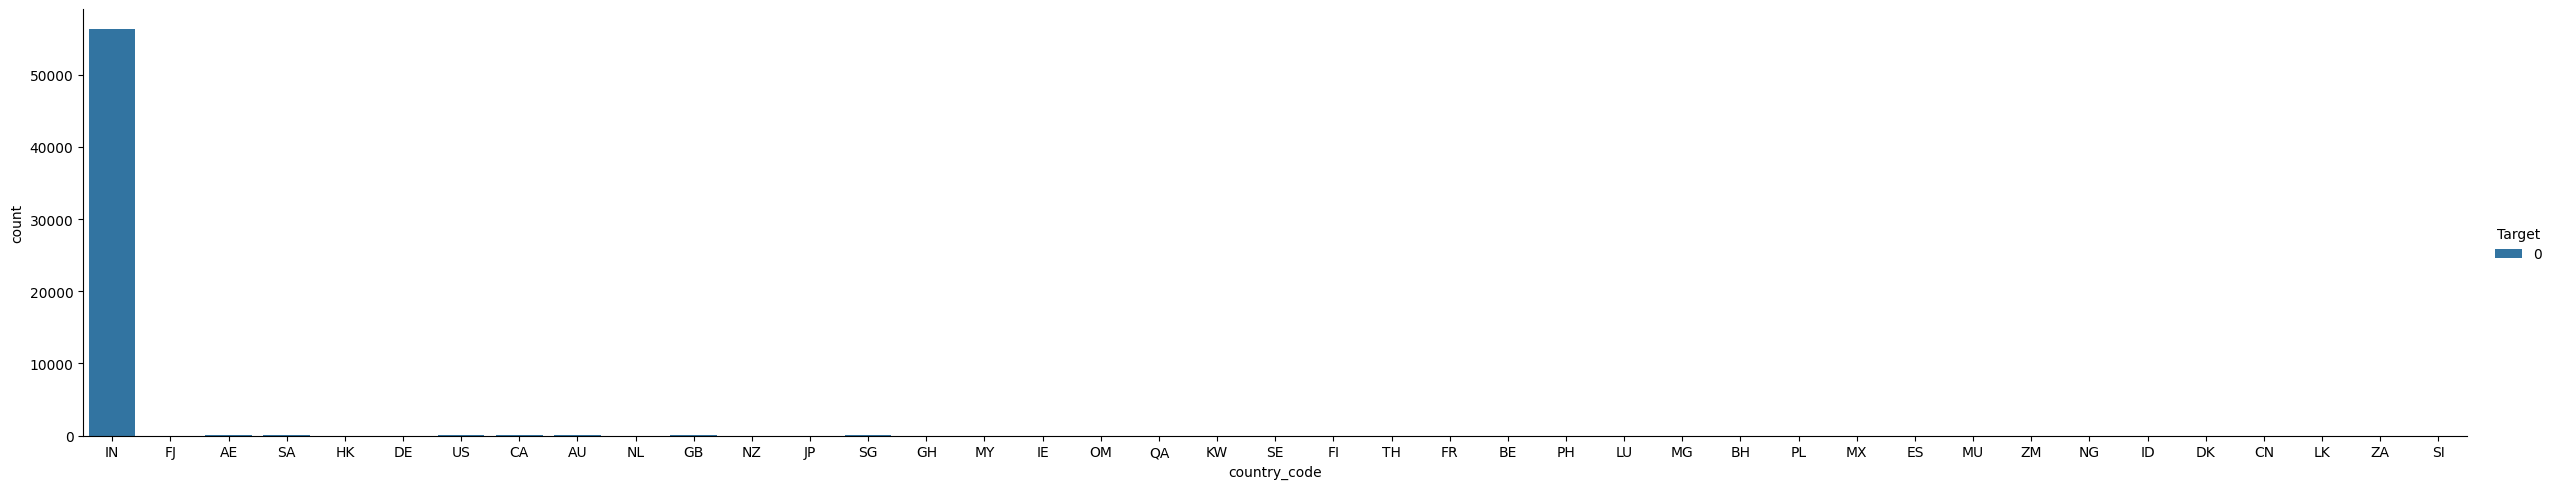

In [ ]:
sns.catplot(data=df_train[df_train['Target'] != 1], x="country_code", kind='count', hue="Target", height=5, aspect=5)

####From the above cells it is clear that country_code is highly imbalanced and may overfit the model.

<Axes: >

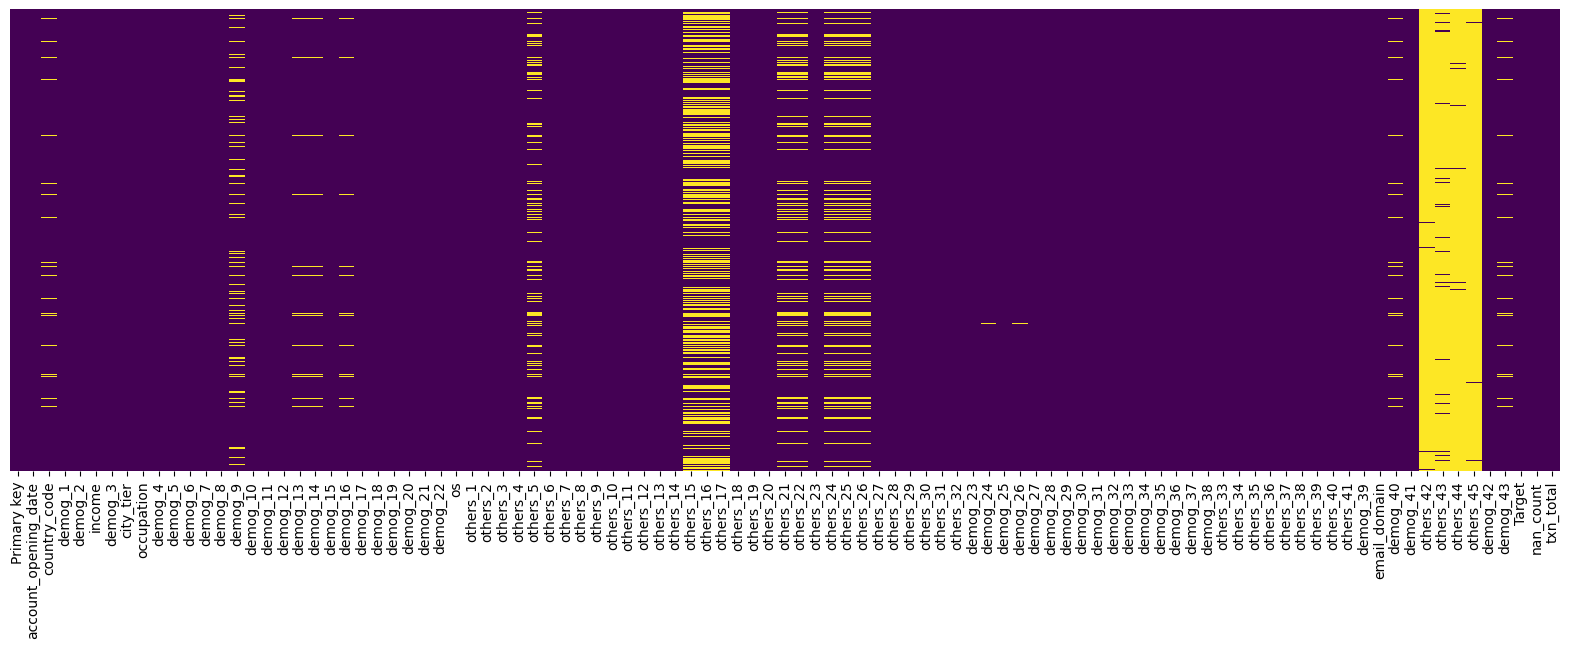

In [ ]:
plt.figure(figsize=(20,6))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

####From the above observations it is quite obvious that columns "others_42","others_43","others_44","others_45"

In [ ]:
df_train=df_train.drop([ "others_42","others_43","others_44","others_45"],axis=1)
df_train

Primary key account_opening_date country_code  demog_1  demog_2  \
80922        80923           2022-12-15           IN        0        1   
96141        96142           2023-01-22           IN        0        1   
56567        56568           2023-01-09           IN        1        1   
76455        76456           2023-03-31           IN        0        1   
14750        14751           2023-02-15           IN        0        1   
...            ...                  ...          ...      ...      ...   
61302        61303           2023-02-20           IN        0        1   
50446        50447           2022-12-21           IN        0        1   
11284        11285           2023-01-12           IN        0        1   
78432        78433           2023-01-17           IN        0        1   
76618        76619           2023-01-06           IN        0        1   

       income  demog_3  city_tier  occupation  demog_4  ...  others_41  \
80922     1.0    101.0          8           0        1  ...        0.0   
96141     1.0    101.0          6           0        1  ...        0.0   
56567     2.0    101.0          5           1        1  ...        0.0   
76455     2.0    102.0          1           0        1  ...        0.0   
14750     2.0    101.0          4           0        1  ...        0.0   
...       ...      ...        ...         ...      ...  ...        ...   
61302     1.0    101.0          8           0        1  ...        0.0   
50446     1.0    101.0          8           0        1  ...        0.0   
11284     1.0    101.0          6           0        1  ...        0.0   
78432     2.0    101.0          3           0        1  ...        0.0   
76618     2.0    101.0          1           0        1  ...        0.0   

       demog_39  email_domain  demog_40  demog_41 demog_42  demog_43  Target  \
80922         1             1       2.0         1        1       1.0       0   
96141         1             1       0.0         1        1       1.0       0   
56567         1             1       1.0         1        1       2.0       0   
76455         1             0       1.0         1        1       1.0       0   
14750         1             1       0.0         1        1       1.0       0   
...         ...           ...       ...       ...      ...       ...     ...   
61302         1             1       2.0         1        1       2.0       0   
50446         1             0       0.0         1        1       1.0       0   
11284         1             1       0.0         1        1       1.0       0   
78432         1             1       0.0         1        1       0.0       0   
76618         1             1       2.0         1        1       1.0       0   

       nan_count  txn_total  
80922          2      126.0  
96141          5        9.0  
56567          1      302.0  
76455          0      300.0  
14750          0      195.0  
...          ...        ...  
61302         81        0.0  
50446         81        0.0  
11284          5        9.0  
78432          0      211.0  
76618          2       65.0  

[60000 rows x 95 columns]

In [ ]:
df_train["demog_10"].describe()

count     59997
unique        1
top           N
freq      59997
Name: demog_10, dtype: object

####Since demog_10 has same values throughout, it is of no use to catch the mule

In [ ]:
df_train=df_train.drop("demog_10",axis=1)
df_train


Primary key account_opening_date country_code  demog_1  demog_2  \
80922        80923           2022-12-15           IN        0        1   
96141        96142           2023-01-22           IN        0        1   
56567        56568           2023-01-09           IN        1        1   
76455        76456           2023-03-31           IN        0        1   
14750        14751           2023-02-15           IN        0        1   
...            ...                  ...          ...      ...      ...   
61302        61303           2023-02-20           IN        0        1   
50446        50447           2022-12-21           IN        0        1   
11284        11285           2023-01-12           IN        0        1   
78432        78433           2023-01-17           IN        0        1   
76618        76619           2023-01-06           IN        0        1   

       income  demog_3  city_tier  occupation  demog_4  ...  others_41  \
80922     1.0    101.0          8           0        1  ...        0.0   
96141     1.0    101.0          6           0        1  ...        0.0   
56567     2.0    101.0          5           1        1  ...        0.0   
76455     2.0    102.0          1           0        1  ...        0.0   
14750     2.0    101.0          4           0        1  ...        0.0   
...       ...      ...        ...         ...      ...  ...        ...   
61302     1.0    101.0          8           0        1  ...        0.0   
50446     1.0    101.0          8           0        1  ...        0.0   
11284     1.0    101.0          6           0        1  ...        0.0   
78432     2.0    101.0          3           0        1  ...        0.0   
76618     2.0    101.0          1           0        1  ...        0.0   

       demog_39  email_domain  demog_40  demog_41  demog_42  demog_43  Target  \
80922         1             1       2.0         1         1       1.0       0   
96141         1             1       0.0         1         1       1.0       0   
56567         1             1       1.0         1         1       2.0       0   
76455         1             0       1.0         1         1       1.0       0   
14750         1             1       0.0         1         1       1.0       0   
...         ...           ...       ...       ...       ...       ...     ...   
61302         1             1       2.0         1         1       2.0       0   
50446         1             0       0.0         1         1       1.0       0   
11284         1             1       0.0         1         1       1.0       0   
78432         1             1       0.0         1         1       0.0       0   
76618         1             1       2.0         1         1       1.0       0   

       nan_count  txn_total  
80922          2      126.0  
96141          5        9.0  
56567          1      302.0  
76455          0      300.0  
14750          0      195.0  
...          ...        ...  
61302         81        0.0  
50446         81        0.0  
11284          5        9.0  
78432          0      211.0  
76618          2       65.0  

[60000 rows x 94 columns]

In [ ]:
# Filling NaN values for Target == 1
df_train.loc[df_train['Target'] == 1] = df_train[df_train['Target'] == 1].fillna(df_train[df_train['Target'] == 1].mean())
df_train.loc[df_train['Target'] == 0] = df_train[df_train['Target'] == 0].fillna(df_train[df_train['Target'] == 0].mean())
df.loc[df['Target'] == 1] = df[df['Target'] == 1].fillna(df[df['Target'] == 1].mean())
df.loc[df['Target'] == 0] = df[df['Target'] == 0].fillna(df[df['Target'] == 0].mean())
df_train.round()
df.round()

for column in df.select_dtypes(include='object').columns:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)

for column in df_train.select_dtypes(include='object').columns:
    mode_value = df_train[column].mode()[0]
    df_train[column].fillna(mode_value, inplace=True)

# Filling NaN values for Target == 0
df_test=df_test.fillna(df_train.median())
df_val=df_val.fillna(df.median())
df_test.round()
df_val.round()

Primary key account_opening_date country_code  demog_1  demog_2  \
0          9000001           2023-03-25           IN        1        0   
1          9000002           2023-01-15           IN        0        1   
2          9000003           2023-06-01           IN        0        1   
3          9000004           2023-08-02           IN        0        1   
4          9000005           2023-01-27           IN        0        1   
...            ...                  ...          ...      ...      ...   
49995      9049996           2023-01-02           IN        1        0   
49996      9049997           2023-01-18           IN        1        1   
49997      9049998           2023-07-02           IN        1        1   
49998      9049999           2023-06-01           IN        1        1   
49999      9050000           2022-11-12           IN        1        1   

       income  demog_3  city_tier  occupation  demog_4  ...  demog_40  \
0         3.0    101.0          7           1        1  ...       2.0   
1         2.0    101.0          5           0        1  ...       0.0   
2         2.0    101.0          1           0        1  ...       0.0   
3         2.0    101.0          1           0        1  ...       1.0   
4         2.0    101.0          5           0        1  ...       0.0   
...       ...      ...        ...         ...      ...  ...       ...   
49995     2.0    101.0          6           1        1  ...       2.0   
49996     2.0    101.0          2           1        1  ...       2.0   
49997     3.0    101.0          0           1        1  ...       0.0   
49998     2.0    101.0          5           0        1  ...       2.0   
49999     2.0    101.0          6           1        1  ...       2.0   

       demog_41  others_42  others_43  others_44 others_45  demog_42  \
0             1       88.0       62.0       29.0      97.0         1   
1             1       88.0       62.0       29.0      97.0         1   
2             1       88.0       62.0       29.0      97.0         1   
3             1       88.0        0.0       29.0      97.0         1   
4             1       88.0       62.0       29.0      97.0         1   
...         ...        ...        ...        ...       ...       ...   
49995         1       88.0       62.0       29.0      97.0         1   
49996         1       88.0       62.0       29.0      97.0         1   
49997         1       88.0       62.0       29.0      97.0         1   
49998         1       88.0       62.0       29.0      97.0         1   
49999         1       88.0       62.0       29.0      97.0         1   

       demog_43  nan_count  txn_total  
0           2.0          0      142.0  
1           1.0         81        0.0  
2           1.0          0      488.0  
3           2.0          0      179.0  
4           2.0         81        0.0  
...         ...        ...        ...  
49995       2.0          1      480.0  
49996       2.0          0      220.0  
49997       2.0          0      244.0  
49998       1.0          0    14683.0  
49999       2.0          0       81.0  

[50000 rows x 98 columns]

####We will now segregate the df dataset into the three catagories(demographic attriutes,transaction history and others) leaving out the named attributes other than "Target"

In [ ]:
transact_data=df_train.filter(like="txn", axis=1)
transact_data.loc[:, 'Target'] = df_train['Target'].values
transact_data

txn_total  Target
80922      126.0       0
96141        9.0       0
56567      302.0       0
76455      300.0       0
14750      195.0       0
...          ...     ...
61302        0.0       0
50446        0.0       0
11284        9.0       0
78432      211.0       0
76618       65.0       0

[60000 rows x 2 columns]

In [ ]:
demog_data=df_train.filter(like="demog", axis=1)
demog_data

demog_1  demog_2  demog_3  demog_4  demog_5  demog_6  demog_7  demog_8  \
80922        0        1    101.0        1      3.0      1.0      1.0        0   
96141        0        1    101.0        1      2.0      1.0      1.0        0   
56567        1        1    101.0        1      3.0      1.0      1.0        0   
76455        0        1    102.0        1      4.0      1.0      1.0        1   
14750        0        1    101.0        1      3.0      1.0      1.0        1   
...        ...      ...      ...      ...      ...      ...      ...      ...   
61302        0        1    101.0        1      2.0      1.0      1.0        0   
50446        0        1    101.0        1      2.0      1.0      1.0        1   
11284        0        1    101.0        1      2.0      1.0      1.0        0   
78432        0        1    101.0        1      3.0      1.0      1.0        0   
76618        0        1    101.0        1      4.0      1.0      1.0        1   

       demog_9  demog_11  ...  demog_34  demog_35  demog_36  demog_37  \
80922      0.0       0.0  ...       1.0       0.0       0.0       0.0   
96141      0.0       0.0  ...       1.0       0.0       0.0       0.0   
56567      1.0       0.0  ...       1.0       0.0       0.0       0.0   
76455      1.0       0.0  ...       1.0       1.0       0.0       0.0   
14750      0.0       0.0  ...       1.0       0.0       0.0       0.0   
...        ...       ...  ...       ...       ...       ...       ...   
61302      0.0       0.0  ...       1.0       0.0       0.0       0.0   
50446      0.0       0.0  ...       1.0       0.0       0.0       0.0   
11284      0.0       0.0  ...       1.0       0.0       0.0       0.0   
78432      0.0       0.0  ...       1.0       0.0       0.0       0.0   
76618      0.0       0.0  ...       1.0       0.0       0.0       0.0   

       demog_38  demog_39  demog_40  demog_41  demog_42  demog_43  
80922       0.0         1       2.0         1         1       1.0  
96141       0.0         1       0.0         1         1       1.0  
56567       0.0         1       1.0         1         1       2.0  
76455       0.0         1       1.0         1         1       1.0  
14750       0.0         1       0.0         1         1       1.0  
...         ...       ...       ...       ...       ...       ...  
61302       0.0         1       2.0         1         1       2.0  
50446       0.0         1       0.0         1         1       1.0  
11284       0.0         1       0.0         1         1       1.0  
78432       0.0         1       0.0         1         1       0.0  
76618       0.0         1       2.0         1         1       1.0  

[60000 rows x 42 columns]

In [ ]:
d=pd.concat([demog_data,df_train['nan_count']],axis=1)
demog_d=pd.concat([d,transact_data],axis=1)
demog_d

demog_1  demog_2  demog_3  demog_4  demog_5  demog_6  demog_7  demog_8  \
80922        0        1    101.0        1      3.0      1.0      1.0        0   
96141        0        1    101.0        1      2.0      1.0      1.0        0   
56567        1        1    101.0        1      3.0      1.0      1.0        0   
76455        0        1    102.0        1      4.0      1.0      1.0        1   
14750        0        1    101.0        1      3.0      1.0      1.0        1   
...        ...      ...      ...      ...      ...      ...      ...      ...   
61302        0        1    101.0        1      2.0      1.0      1.0        0   
50446        0        1    101.0        1      2.0      1.0      1.0        1   
11284        0        1    101.0        1      2.0      1.0      1.0        0   
78432        0        1    101.0        1      3.0      1.0      1.0        0   
76618        0        1    101.0        1      4.0      1.0      1.0        1   

       demog_9  demog_11  ...  demog_37  demog_38  demog_39  demog_40  \
80922      0.0       0.0  ...       0.0       0.0         1       2.0   
96141      0.0       0.0  ...       0.0       0.0         1       0.0   
56567      1.0       0.0  ...       0.0       0.0         1       1.0   
76455      1.0       0.0  ...       0.0       0.0         1       1.0   
14750      0.0       0.0  ...       0.0       0.0         1       0.0   
...        ...       ...  ...       ...       ...       ...       ...   
61302      0.0       0.0  ...       0.0       0.0         1       2.0   
50446      0.0       0.0  ...       0.0       0.0         1       0.0   
11284      0.0       0.0  ...       0.0       0.0         1       0.0   
78432      0.0       0.0  ...       0.0       0.0         1       0.0   
76618      0.0       0.0  ...       0.0       0.0         1       2.0   

       demog_41  demog_42  demog_43  nan_count  txn_total  Target  
80922         1         1       1.0          2      126.0       0  
96141         1         1       1.0          5        9.0       0  
56567         1         1       2.0          1      302.0       0  
76455         1         1       1.0          0      300.0       0  
14750         1         1       1.0          0      195.0       0  
...         ...       ...       ...        ...        ...     ...  
61302         1         1       2.0         81        0.0       0  
50446         1         1       1.0         81        0.0       0  
11284         1         1       1.0          5        9.0       0  
78432         1         1       0.0          0      211.0       0  
76618         1         1       1.0          2       65.0       0  

[60000 rows x 45 columns]

In [ ]:
others_data=df_train.filter(like="others", axis=1)
others_data

others_1  others_2  others_3  others_4  others_5  others_6  others_7  \
80922         0         0       0.0       0.0  1.000000     233.0     233.0   
96141         1         0       0.0       0.0  0.000000     195.0     195.0   
56567         0         0       0.0       0.0  0.000000     208.0     208.0   
76455         1         1       0.0       0.0  1.000000     127.0     127.0   
14750         0         1       0.0       0.0  1.000000     171.0      95.0   
...         ...       ...       ...       ...       ...       ...       ...   
61302         1         0       0.0       0.0  0.649827     166.0     166.0   
50446         0         0       0.0       0.0  0.649827     227.0     227.0   
11284         1         0       0.0       0.0  0.000000     205.0     205.0   
78432         0         0       0.0       0.0  1.000000     200.0     200.0   
76618         0         1       0.0       0.0  1.000000     211.0     211.0   

       others_8  others_9  others_10  ...  others_32  others_33  others_34  \
80922         1     233.0      233.0  ...        0.0          0          0   
96141         1     237.0      195.0  ...        0.0          0          0   
56567         1     208.0      208.0  ...        0.0          0          0   
76455         1     444.0      127.0  ...        0.0          0          0   
14750         1     171.0       95.0  ...        0.0          0          0   
...         ...       ...        ...  ...        ...        ...        ...   
61302         1     691.0      166.0  ...        0.0          0          0   
50446         1     227.0      227.0  ...        0.0          0          0   
11284         1     259.0      205.0  ...        0.0          0          0   
78432         1     200.0      200.0  ...        0.0          0          0   
76618         1     211.0      211.0  ...        0.0          0          0   

       others_35  others_36  others_37  others_38  others_39  others_40  \
80922          1          1          0          0          0        0.0   
96141          0          1          0          0          0        0.0   
56567          0          1          0          0          0        0.0   
76455          1          1          0          0          0        0.0   
14750          0          1          0          0          1        0.0   
...          ...        ...        ...        ...        ...        ...   
61302          0          0          0          0          0        0.0   
50446          0          0          0          0          0        0.0   
11284          0          0          0          0          0        0.0   
78432          0          1          0          0          0        0.0   
76618          0          1          0          0          0        0.0   

       others_41  
80922        0.0  
96141        0.0  
56567        0.0  
76455        0.0  
14750        0.0  
...          ...  
61302        0.0  
50446        0.0  
11284        0.0  
78432        0.0  
76618        0.0  

[60000 rows x 41 columns]

In [ ]:
o=pd.concat([others_data,df_train['nan_count']],axis=1)
others_d=pd.concat([o,transact_data],axis=1)
others_d

others_1  others_2  others_3  others_4  others_5  others_6  others_7  \
80922         0         0       0.0       0.0  1.000000     233.0     233.0   
96141         1         0       0.0       0.0  0.000000     195.0     195.0   
56567         0         0       0.0       0.0  0.000000     208.0     208.0   
76455         1         1       0.0       0.0  1.000000     127.0     127.0   
14750         0         1       0.0       0.0  1.000000     171.0      95.0   
...         ...       ...       ...       ...       ...       ...       ...   
61302         1         0       0.0       0.0  0.649827     166.0     166.0   
50446         0         0       0.0       0.0  0.649827     227.0     227.0   
11284         1         0       0.0       0.0  0.000000     205.0     205.0   
78432         0         0       0.0       0.0  1.000000     200.0     200.0   
76618         0         1       0.0       0.0  1.000000     211.0     211.0   

       others_8  others_9  others_10  ...  others_35  others_36  others_37  \
80922         1     233.0      233.0  ...          1          1          0   
96141         1     237.0      195.0  ...          0          1          0   
56567         1     208.0      208.0  ...          0          1          0   
76455         1     444.0      127.0  ...          1          1          0   
14750         1     171.0       95.0  ...          0          1          0   
...         ...       ...        ...  ...        ...        ...        ...   
61302         1     691.0      166.0  ...          0          0          0   
50446         1     227.0      227.0  ...          0          0          0   
11284         1     259.0      205.0  ...          0          0          0   
78432         1     200.0      200.0  ...          0          1          0   
76618         1     211.0      211.0  ...          0          1          0   

       others_38  others_39  others_40  others_41  nan_count  txn_total  \
80922          0          0        0.0        0.0          2      126.0   
96141          0          0        0.0        0.0          5        9.0   
56567          0          0        0.0        0.0          1      302.0   
76455          0          0        0.0        0.0          0      300.0   
14750          0          1        0.0        0.0          0      195.0   
...          ...        ...        ...        ...        ...        ...   
61302          0          0        0.0        0.0         81        0.0   
50446          0          0        0.0        0.0         81        0.0   
11284          0          0        0.0        0.0          5        9.0   
78432          0          0        0.0        0.0          0      211.0   
76618          0          0        0.0        0.0          2       65.0   

       Target  
80922       0  
96141       0  
56567       0  
76455       0  
14750       0  
...       ...  
61302       0  
50446       0  
11284       0  
78432       0  
76618       0  

[60000 rows x 44 columns]

In [ ]:
demog_d

demog_1  demog_2  demog_3  demog_4  demog_5  demog_6  demog_7  demog_8  \
80922        0        1    101.0        1      3.0      1.0      1.0        0   
96141        0        1    101.0        1      2.0      1.0      1.0        0   
56567        1        1    101.0        1      3.0      1.0      1.0        0   
76455        0        1    102.0        1      4.0      1.0      1.0        1   
14750        0        1    101.0        1      3.0      1.0      1.0        1   
...        ...      ...      ...      ...      ...      ...      ...      ...   
61302        0        1    101.0        1      2.0      1.0      1.0        0   
50446        0        1    101.0        1      2.0      1.0      1.0        1   
11284        0        1    101.0        1      2.0      1.0      1.0        0   
78432        0        1    101.0        1      3.0      1.0      1.0        0   
76618        0        1    101.0        1      4.0      1.0      1.0        1   

       demog_9  demog_11  ...  demog_37  demog_38  demog_39  demog_40  \
80922      0.0       0.0  ...       0.0       0.0         1       2.0   
96141      0.0       0.0  ...       0.0       0.0         1       0.0   
56567      1.0       0.0  ...       0.0       0.0         1       1.0   
76455      1.0       0.0  ...       0.0       0.0         1       1.0   
14750      0.0       0.0  ...       0.0       0.0         1       0.0   
...        ...       ...  ...       ...       ...       ...       ...   
61302      0.0       0.0  ...       0.0       0.0         1       2.0   
50446      0.0       0.0  ...       0.0       0.0         1       0.0   
11284      0.0       0.0  ...       0.0       0.0         1       0.0   
78432      0.0       0.0  ...       0.0       0.0         1       0.0   
76618      0.0       0.0  ...       0.0       0.0         1       2.0   

       demog_41  demog_42  demog_43  nan_count  txn_total  Target  
80922         1         1       1.0          2      126.0       0  
96141         1         1       1.0          5        9.0       0  
56567         1         1       2.0          1      302.0       0  
76455         1         1       1.0          0      300.0       0  
14750         1         1       1.0          0      195.0       0  
...         ...       ...       ...        ...        ...     ...  
61302         1         1       2.0         81        0.0       0  
50446         1         1       1.0         81        0.0       0  
11284         1         1       1.0          5        9.0       0  
78432         1         1       0.0          0      211.0       0  
76618         1         1       1.0          2       65.0       0  

[60000 rows x 45 columns]

In [ ]:
transact_data

txn_total  Target
80922      126.0       0
96141        9.0       0
56567      302.0       0
76455      300.0       0
14750      195.0       0
...          ...     ...
61302        0.0       0
50446        0.0       0
11284        9.0       0
78432      211.0       0
76618       65.0       0

[60000 rows x 2 columns]

In [ ]:
others_d

others_1  others_2  others_3  others_4  others_5  others_6  others_7  \
80922         0         0       0.0       0.0  1.000000     233.0     233.0   
96141         1         0       0.0       0.0  0.000000     195.0     195.0   
56567         0         0       0.0       0.0  0.000000     208.0     208.0   
76455         1         1       0.0       0.0  1.000000     127.0     127.0   
14750         0         1       0.0       0.0  1.000000     171.0      95.0   
...         ...       ...       ...       ...       ...       ...       ...   
61302         1         0       0.0       0.0  0.649827     166.0     166.0   
50446         0         0       0.0       0.0  0.649827     227.0     227.0   
11284         1         0       0.0       0.0  0.000000     205.0     205.0   
78432         0         0       0.0       0.0  1.000000     200.0     200.0   
76618         0         1       0.0       0.0  1.000000     211.0     211.0   

       others_8  others_9  others_10  ...  others_35  others_36  others_37  \
80922         1     233.0      233.0  ...          1          1          0   
96141         1     237.0      195.0  ...          0          1          0   
56567         1     208.0      208.0  ...          0          1          0   
76455         1     444.0      127.0  ...          1          1          0   
14750         1     171.0       95.0  ...          0          1          0   
...         ...       ...        ...  ...        ...        ...        ...   
61302         1     691.0      166.0  ...          0          0          0   
50446         1     227.0      227.0  ...          0          0          0   
11284         1     259.0      205.0  ...          0          0          0   
78432         1     200.0      200.0  ...          0          1          0   
76618         1     211.0      211.0  ...          0          1          0   

       others_38  others_39  others_40  others_41  nan_count  txn_total  \
80922          0          0        0.0        0.0          2      126.0   
96141          0          0        0.0        0.0          5        9.0   
56567          0          0        0.0        0.0          1      302.0   
76455          0          0        0.0        0.0          0      300.0   
14750          0          1        0.0        0.0          0      195.0   
...          ...        ...        ...        ...        ...        ...   
61302          0          0        0.0        0.0         81        0.0   
50446          0          0        0.0        0.0         81        0.0   
11284          0          0        0.0        0.0          5        9.0   
78432          0          0        0.0        0.0          0      211.0   
76618          0          0        0.0        0.0          2       65.0   

       Target  
80922       0  
96141       0  
56567       0  
76455       0  
14750       0  
...       ...  
61302       0  
50446       0  
11284       0  
78432       0  
76618       0  

[60000 rows x 44 columns]

##Transaction Data

In [ ]:
transact_data.describe()

txn_total        Target
count  60000.000000  60000.000000
mean     218.689317      0.020000
std      981.863417      0.140001
min        0.000000      0.000000
25%        0.000000      0.000000
50%       66.000000      0.000000
75%      200.000000      0.000000
max    65128.000000      1.000000

##Demog data

In [ ]:
demog_data.describe()

demog_1       demog_2       demog_3       demog_4       demog_5  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.340483      0.881067    101.321422      0.901133      3.289612   
std        0.473876      0.323713      5.319314      0.298485      0.833660   
min        0.000000      0.000000    101.000000      0.000000      1.000000   
25%        0.000000      1.000000    101.000000      1.000000      3.000000   
50%        0.000000      1.000000    101.000000      1.000000      4.000000   
75%        1.000000      1.000000    101.000000      1.000000      4.000000   
max        1.000000      1.000000    213.000000      1.000000      4.000000   

            demog_6  demog_7       demog_8       demog_9      demog_11  ...  \
count  60000.000000  60000.0  60000.000000  60000.000000  60000.000000  ...   
mean       1.018117      1.0      0.199133      0.325661      0.002217  ...   
std        0.189092      0.0      0.399352      0.438427      0.047030  ...   
min        1.000000      1.0      0.000000      0.000000      0.000000  ...   
25%        1.000000      1.0      0.000000      0.000000      0.000000  ...   
50%        1.000000      1.0      0.000000      0.000000      0.000000  ...   
75%        1.000000      1.0      0.000000      1.000000      0.000000  ...   
max        4.000000      1.0      1.000000      1.000000      1.000000  ...   

           demog_34      demog_35      demog_36      demog_37  demog_38  \
count  60000.000000  60000.000000  60000.000000  60000.000000   60000.0   
mean       0.963050      0.005817      0.005683      0.000017       0.0   
std        0.188641      0.076046      0.075174      0.004082       0.0   
min        0.000000      0.000000      0.000000      0.000000       0.0   
25%        1.000000      0.000000      0.000000      0.000000       0.0   
50%        1.000000      0.000000      0.000000      0.000000       0.0   
75%        1.000000      0.000000      0.000000      0.000000       0.0   
max        1.000000      1.000000      1.000000      1.000000       0.0   

           demog_39      demog_40      demog_41      demog_42      demog_43  
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000  
mean       0.999917      0.645340      0.962667      0.958167      1.181646  
std        0.009128      0.803093      0.189579      0.200210      0.564656  
min        0.000000      0.000000      0.000000      0.000000      0.000000  
25%        1.000000      0.000000      1.000000      1.000000      1.000000  
50%        1.000000      0.000000      1.000000      1.000000      1.000000  
75%        1.000000      1.000000      1.000000      1.000000      2.000000  
max        1.000000      2.000000      1.000000      1.000000      2.000000  

[8 rows x 42 columns]

In [ ]:
# print(demog_data.max(),"     ",demog_data.min(),"   ",demog_data.mean(),"      ",demog_data.std(),"    ",demog_data.count())
demog_d.count()

demog_1      60000
demog_2      60000
demog_3      60000
demog_4      60000
demog_5      60000
demog_6      60000
demog_7      60000
demog_8      60000
demog_9      60000
demog_11     60000
demog_12     60000
demog_13     60000
demog_14     60000
demog_15     60000
demog_16     60000
demog_17     60000
demog_18     60000
demog_19     60000
demog_20     60000
demog_21     60000
demog_22     60000
demog_23     60000
demog_24     60000
demog_25     60000
demog_26     60000
demog_27     60000
demog_28     60000
demog_29     60000
demog_30     60000
demog_31     60000
demog_32     60000
demog_33     60000
demog_34     60000
demog_35     60000
demog_36     60000
demog_37     60000
demog_38     60000
demog_39     60000
demog_40     60000
demog_41     60000
demog_42     60000
demog_43     60000
nan_count    60000
txn_total    60000
Target       60000
dtype: int64

In [ ]:
demog_data["demog_38"].value_counts()

0.0    60000
Name: demog_38, dtype: int64

In [ ]:
demog_data["demog_12"].value_counts()

0.0    60000
Name: demog_12, dtype: int64

In [ ]:
demog_data["demog_7"].value_counts()

1.0    60000
Name: demog_7, dtype: int64

####No use of the above three since all values are same

In [ ]:
demog_d=demog_d.drop(["demog_12",'demog_38','demog_7'],axis=1)

In [ ]:
demog_d['txn_total'].value_counts()

0.0       17519
9.0        2083
10.0        741
21.0        629
22.0        538
          ...  
1638.0        1
1475.0        1
6016.0        1
1452.0        1
1618.0        1
Name: txn_total, Length: 2273, dtype: int64

In [ ]:
demog_d.count()<60000

demog_1      False
demog_2      False
demog_3      False
demog_4      False
demog_5      False
demog_6      False
demog_8      False
demog_9      False
demog_11     False
demog_13     False
demog_14     False
demog_15     False
demog_16     False
demog_17     False
demog_18     False
demog_19     False
demog_20     False
demog_21     False
demog_22     False
demog_23     False
demog_24     False
demog_25     False
demog_26     False
demog_27     False
demog_28     False
demog_29     False
demog_30     False
demog_31     False
demog_32     False
demog_33     False
demog_34     False
demog_35     False
demog_36     False
demog_37     False
demog_39     False
demog_40     False
demog_41     False
demog_42     False
demog_43     False
nan_count    False
txn_total    False
Target       False
dtype: bool

In [ ]:
#Normalizing the data
for i in demog_d.columns:
    demog_d.loc[:,i]=(demog_d.loc[:,i]-demog_d.loc[:,i].mean())
    demog_d.loc[:,i]=demog_d.loc[:,i]/demog_d.loc[:,i].std()
demog_d

demog_1   demog_2   demog_3   demog_4   demog_5   demog_6   demog_8  \
80922 -0.718508  0.367404 -0.060425  0.331228 -0.347398 -0.095809 -0.498641   
96141 -0.718508  0.367404 -0.060425  0.331228 -1.546927 -0.095809 -0.498641   
56567  1.391750  0.367404 -0.060425  0.331228 -0.347398 -0.095809 -0.498641   
76455 -0.718508  0.367404  0.127569  0.331228  0.852131 -0.095809  2.005416   
14750 -0.718508  0.367404 -0.060425  0.331228 -0.347398 -0.095809  2.005416   
...         ...       ...       ...       ...       ...       ...       ...   
61302 -0.718508  0.367404 -0.060425  0.331228 -1.546927 -0.095809 -0.498641   
50446 -0.718508  0.367404 -0.060425  0.331228 -1.546927 -0.095809  2.005416   
11284 -0.718508  0.367404 -0.060425  0.331228 -1.546927 -0.095809 -0.498641   
78432 -0.718508  0.367404 -0.060425  0.331228 -0.347398 -0.095809 -0.498641   
76618 -0.718508  0.367404 -0.060425  0.331228  0.852131 -0.095809  2.005416   

        demog_9  demog_11  demog_13  ...  demog_36  demog_37  demog_39  \
80922 -0.742793 -0.047133  0.232192  ... -0.075603 -0.004086  0.009129   
96141 -0.742793 -0.047133  0.232192  ... -0.075603 -0.004086  0.009129   
56567  1.538086 -0.047133  0.232192  ... -0.075603 -0.004086  0.009129   
76455  1.538086 -0.047133  0.232192  ... -0.075603 -0.004086  0.009129   
14750 -0.742793 -0.047133  0.232192  ... -0.075603 -0.004086  0.009129   
...         ...       ...       ...  ...       ...       ...       ...   
61302 -0.742793 -0.047133  0.232192  ... -0.075603 -0.004086  0.009129   
50446 -0.742793 -0.047133  0.232192  ... -0.075603 -0.004086  0.009129   
11284 -0.742793 -0.047133  0.232192  ... -0.075603 -0.004086  0.009129   
78432 -0.742793 -0.047133  0.232192  ... -0.075603 -0.004086  0.009129   
76618 -0.742793 -0.047133  0.232192  ... -0.075603 -0.004086  0.009129   

       demog_40  demog_41  demog_42  demog_43  nan_count  txn_total    Target  
80922  1.686803  0.196928  0.208947 -0.321694  -0.581710  -0.094401 -0.142856  
96141 -0.803568  0.196928  0.208947 -0.321694  -0.495419  -0.213563 -0.142856  
56567  0.441618  0.196928  0.208947  1.449297  -0.610474   0.084850 -0.142856  
76455  0.441618  0.196928  0.208947 -0.321694  -0.639238   0.082813 -0.142856  
14750 -0.803568  0.196928  0.208947 -0.321694  -0.639238  -0.024127 -0.142856  
...         ...       ...       ...       ...        ...        ...       ...  
61302  1.686803  0.196928  0.208947  1.449297   1.690628  -0.222729 -0.142856  
50446 -0.803568  0.196928  0.208947 -0.321694   1.690628  -0.222729 -0.142856  
11284 -0.803568  0.196928  0.208947 -0.321694  -0.495419  -0.213563 -0.142856  
78432 -0.803568  0.196928  0.208947 -2.092685  -0.639238  -0.007831 -0.142856  
76618  1.686803  0.196928  0.208947 -0.321694  -0.581710  -0.156528 -0.142856  

[60000 rows x 42 columns]

In [ ]:
demog_d

demog_1   demog_2   demog_3   demog_4   demog_5   demog_6   demog_8  \
80922 -0.718508  0.367404 -0.060425  0.331228 -0.347398 -0.095809 -0.498641   
96141 -0.718508  0.367404 -0.060425  0.331228 -1.546927 -0.095809 -0.498641   
56567  1.391750  0.367404 -0.060425  0.331228 -0.347398 -0.095809 -0.498641   
76455 -0.718508  0.367404  0.127569  0.331228  0.852131 -0.095809  2.005416   
14750 -0.718508  0.367404 -0.060425  0.331228 -0.347398 -0.095809  2.005416   
...         ...       ...       ...       ...       ...       ...       ...   
61302 -0.718508  0.367404 -0.060425  0.331228 -1.546927 -0.095809 -0.498641   
50446 -0.718508  0.367404 -0.060425  0.331228 -1.546927 -0.095809  2.005416   
11284 -0.718508  0.367404 -0.060425  0.331228 -1.546927 -0.095809 -0.498641   
78432 -0.718508  0.367404 -0.060425  0.331228 -0.347398 -0.095809 -0.498641   
76618 -0.718508  0.367404 -0.060425  0.331228  0.852131 -0.095809  2.005416   

        demog_9  demog_11  demog_13  ...  demog_36  demog_37  demog_39  \
80922 -0.742793 -0.047133  0.232192  ... -0.075603 -0.004086  0.009129   
96141 -0.742793 -0.047133  0.232192  ... -0.075603 -0.004086  0.009129   
56567  1.538086 -0.047133  0.232192  ... -0.075603 -0.004086  0.009129   
76455  1.538086 -0.047133  0.232192  ... -0.075603 -0.004086  0.009129   
14750 -0.742793 -0.047133  0.232192  ... -0.075603 -0.004086  0.009129   
...         ...       ...       ...  ...       ...       ...       ...   
61302 -0.742793 -0.047133  0.232192  ... -0.075603 -0.004086  0.009129   
50446 -0.742793 -0.047133  0.232192  ... -0.075603 -0.004086  0.009129   
11284 -0.742793 -0.047133  0.232192  ... -0.075603 -0.004086  0.009129   
78432 -0.742793 -0.047133  0.232192  ... -0.075603 -0.004086  0.009129   
76618 -0.742793 -0.047133  0.232192  ... -0.075603 -0.004086  0.009129   

       demog_40  demog_41  demog_42  demog_43  nan_count  txn_total    Target  
80922  1.686803  0.196928  0.208947 -0.321694  -0.581710  -0.094401 -0.142856  
96141 -0.803568  0.196928  0.208947 -0.321694  -0.495419  -0.213563 -0.142856  
56567  0.441618  0.196928  0.208947  1.449297  -0.610474   0.084850 -0.142856  
76455  0.441618  0.196928  0.208947 -0.321694  -0.639238   0.082813 -0.142856  
14750 -0.803568  0.196928  0.208947 -0.321694  -0.639238  -0.024127 -0.142856  
...         ...       ...       ...       ...        ...        ...       ...  
61302  1.686803  0.196928  0.208947  1.449297   1.690628  -0.222729 -0.142856  
50446 -0.803568  0.196928  0.208947 -0.321694   1.690628  -0.222729 -0.142856  
11284 -0.803568  0.196928  0.208947 -0.321694  -0.495419  -0.213563 -0.142856  
78432 -0.803568  0.196928  0.208947 -2.092685  -0.639238  -0.007831 -0.142856  
76618  1.686803  0.196928  0.208947 -0.321694  -0.581710  -0.156528 -0.142856  

[60000 rows x 42 columns]

In [ ]:
cd=demog_d.corr(method='spearman')
plt.figure(figsize=(200,150))
sns.set(font_scale=1.4)
sns.heatmap(cd.abs(),cmap="Reds",annot=True,annot_kws={"size":15},vmax=1,vmin=0.02)

<Axes: >

##Others

In [ ]:
others_data.describe()

others_1      others_2      others_3      others_4      others_5  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.359633      0.084367      0.006517      0.021933      0.645813   
std        0.479897      0.277939      0.080463      0.146467      0.436440   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      1.000000   
75%        1.000000      0.000000      0.000000      0.000000      1.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

           others_6      others_7      others_8      others_9     others_10  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean     193.237150    180.728796      0.978317    302.480479    172.281482   
std      106.058236     51.978936      0.145649    304.768793     58.039567   
min        1.000000      1.000000      0.000000      1.000000      1.000000   
25%      158.000000    154.000000      1.000000    170.000000    145.000000   
50%      190.000000    187.000000      1.000000    210.000000    182.000000   
75%      221.000000    220.000000      1.000000    247.000000    217.000000   
max     2697.000000   1970.000000      1.000000   5556.000000   1552.000000   

       ...     others_32     others_33     others_34     others_35  \
count  ...  60000.000000  60000.000000  60000.000000  60000.000000   
mean   ...      0.012850      0.004217      0.009633      0.140517   
std    ...      0.112628      0.064799      0.097676      0.347525   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

          others_36     others_37     others_38     others_39     others_40  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.471700      0.015700      0.000483      0.064733      0.004867   
std        0.499203      0.124313      0.021980      0.246057      0.069592   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

          others_41  
count  60000.000000  
mean       0.002500  
std        0.049938  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 41 columns]

In [ ]:
others_d.count()

others_1     60000
others_2     60000
others_3     60000
others_4     60000
others_5     60000
others_6     60000
others_7     60000
others_8     60000
others_9     60000
others_10    60000
others_11    60000
others_12    60000
others_13    60000
others_14    60000
others_15    60000
others_16    60000
others_17    60000
others_18    60000
others_19    60000
others_20    60000
others_21    60000
others_22    60000
others_23    60000
others_24    60000
others_25    60000
others_26    60000
others_27    60000
others_28    60000
others_29    60000
others_30    60000
others_31    60000
others_32    60000
others_33    60000
others_34    60000
others_35    60000
others_36    60000
others_37    60000
others_38    60000
others_39    60000
others_40    60000
others_41    60000
nan_count    60000
txn_total    60000
Target       60000
dtype: int64

In [ ]:
#Normalizing the data
for i in others_d.columns:
    others_d.loc[:,i]=(others_d.loc[:,i]-others_d.loc[:,i].mean())
    others_d.loc[:,i]=others_d.loc[:,i]/others_d.loc[:,i].std()
others_d

others_1  others_2  others_3  others_4  others_5  others_6  others_7  \
80922 -0.749397 -0.303544  -0.08099 -0.149749  0.811536  0.374915  1.005623   
96141  1.334384 -0.303544  -0.08099 -0.149749 -1.479730  0.016622  0.274557   
56567 -0.749397 -0.303544  -0.08099 -0.149749 -1.479730  0.139196  0.524659   
76455  1.334384  3.294365  -0.08099 -0.149749  0.811536 -0.624536 -1.033665   
14750 -0.749397  3.294365  -0.08099 -0.149749  0.811536 -0.209669 -1.649299   
...         ...       ...       ...       ...       ...       ...       ...   
61302  1.334384 -0.303544  -0.08099 -0.149749  0.009196 -0.256813 -0.283361   
50446 -0.749397 -0.303544  -0.08099 -0.149749  0.009196  0.318343  0.890191   
11284  1.334384 -0.303544  -0.08099 -0.149749 -1.479730  0.110909  0.466943   
78432 -0.749397 -0.303544  -0.08099 -0.149749  0.811536  0.063765  0.370750   
76618 -0.749397  3.294365  -0.08099 -0.149749  0.811536  0.167482  0.582374   

       others_8  others_9  others_10  ...  others_35  others_36  others_37  \
80922  0.148874 -0.227978   1.046157  ...   2.473154   1.058288  -0.126294   
96141  0.148874 -0.214853   0.391432  ...  -0.404335   1.058288  -0.126294   
56567  0.148874 -0.310007   0.615417  ...  -0.404335   1.058288  -0.126294   
76455  0.148874  0.464350  -0.780183  ...   2.473154   1.058288  -0.126294   
14750  0.148874 -0.431411  -1.331531  ...  -0.404335   1.058288  -0.126294   
...         ...       ...        ...  ...        ...        ...        ...   
61302  0.148874  1.274801  -0.108228  ...  -0.404335  -0.944907  -0.126294   
50446  0.148874 -0.247665   0.942780  ...  -0.404335  -0.944907  -0.126294   
11284  0.148874 -0.142667   0.563728  ...  -0.404335  -0.944907  -0.126294   
78432  0.148874 -0.336256   0.477580  ...  -0.404335   1.058288  -0.126294   
76618  0.148874 -0.300164   0.667106  ...  -0.404335   1.058288  -0.126294   

       others_38  others_39  others_40  others_41  nan_count  txn_total  \
80922   -0.02199  -0.263083  -0.069931  -0.050062  -0.581710  -0.094401   
96141   -0.02199  -0.263083  -0.069931  -0.050062  -0.495419  -0.213563   
56567   -0.02199  -0.263083  -0.069931  -0.050062  -0.610474   0.084850   
76455   -0.02199  -0.263083  -0.069931  -0.050062  -0.639238   0.082813   
14750   -0.02199   3.801020  -0.069931  -0.050062  -0.639238  -0.024127   
...          ...        ...        ...        ...        ...        ...   
61302   -0.02199  -0.263083  -0.069931  -0.050062   1.690628  -0.222729   
50446   -0.02199  -0.263083  -0.069931  -0.050062   1.690628  -0.222729   
11284   -0.02199  -0.263083  -0.069931  -0.050062  -0.495419  -0.213563   
78432   -0.02199  -0.263083  -0.069931  -0.050062  -0.639238  -0.007831   
76618   -0.02199  -0.263083  -0.069931  -0.050062  -0.581710  -0.156528   

         Target  
80922 -0.142856  
96141 -0.142856  
56567 -0.142856  
76455 -0.142856  
14750 -0.142856  
...         ...  
61302 -0.142856  
50446 -0.142856  
11284 -0.142856  
78432 -0.142856  
76618 -0.142856  

[60000 rows x 44 columns]

In [ ]:
cd=others_d.corr(method='spearman')
plt.figure(figsize=(200,150))
sns.set(font_scale=1.4)
sns.heatmap(cd.abs(),cmap="Reds",annot=True,annot_kws={"size":15},vmax=1,vmin=0.02)

<Axes: >

In [208]:
others_d.columns

Index(['others_1', 'others_2', 'others_3', 'others_4', 'others_5', 'others_6',
       'others_7', 'others_8', 'others_9', 'others_10', 'others_11',
       'others_12', 'others_13', 'others_14', 'others_15', 'others_16',
       'others_17', 'others_18', 'others_19', 'others_20', 'others_21',
       'others_22', 'others_23', 'others_24', 'others_25', 'others_26',
       'others_27', 'others_28', 'others_29', 'others_30', 'others_31',
       'others_32', 'others_33', 'others_34', 'others_35', 'others_36',
       'others_37', 'others_38', 'others_39', 'others_40', 'others_41',
       'nan_count', 'txn_total', 'Target'],
      dtype='object')

others->13, 7,9,10, 15 and 16 had high correlation with eachother and had more or less similar values.We used 13 also had better correlation as compared to 7,9, and 10 ... even though the correlation of 13 was 0.01 less than that of 16 and 15, we used 13 bcoz 16 and 15 had a lot of nan values, as a result the correlation with traget may not be that accurate

In [214]:
df_train.drop(['others_7','others_9','others_10','others_15','others_16'],axis=1,inplace=True)

####others->4,30,32 are highly correlated but 4 had better correlation with  target

In [215]:
df_train.drop(['others_30','others_32'],axis=1,inplace=True)

In [216]:
df_train[df_train['Target']==1]['others_4'].value_counts()

0.0    1189
1.0      11
Name: others_4, dtype: int64

In [217]:
df_train[df_train['Target']==0]['others_4'].value_counts()

0.0    57495
1.0     1305
Name: others_4, dtype: int64

####others_4 is highly unbalanced and biased, not useful

In [218]:
df_train.drop(['others_4'],axis=1,inplace=True)

others-> 14 and 18 had high correlation, but 14 had better correlation with the target and high classw imbalance

In [219]:
df_train.drop(['others_14'],axis=1,inplace=True)

####others->21,22,25,26 had very high correlation but 25 was better...but after checking it with the filter and wrapper methods as well as on training it with the model, we found 25 does not work

In [220]:
df_train.drop(['others_21','others_22','others_25','others_26'],axis=1,inplace=True)

####others-> 6,12 and 33 which had high correlation with each other, we found out 12 is not a useful feature from the wrapper and filter methods.

In [221]:
df_train.drop(['others_6','others_33','others_12',],axis=1,inplace=True)

others->29,19,31 and 40 had very high correlation with eachother, but 29 even being the best of all, it did not work well with the model

In [222]:
df_train.drop(['others_29','others_19','others_31','others_40'],axis=1,inplace=True)

others->11 and 1 , 1 works well

In [223]:
df_train.drop(['others_11'],axis=1,inplace=True)

#Select

In [204]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pylab as plt
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns
# from skrebate import ReliefF
from sklearn.feature_selection import SelectKBest,chi2,f_classif,VarianceThreshold,mutual_info_classif,f_regression,RFECV
# from skfeature.function.similarity_based import fisher_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss
from imblearn.over_sampling import ADASYN

In [205]:
# Select 20 optimal features
k_best = 30
selector = SelectKBest(score_func=chi2, k=k_best)
X_selected = selector.fit_transform(abs(X_train), y_train)
selected_indices = selector.get_support(indices=True)
selected_features1 =df_train.columns[selected_indices]

# Display the selected features
print("Selected Features using Chi-Square:")
print(selected_features1)
# final.extend(selected_features)

Selected Features using Chi-Square:
Index(['account_opening_date', 'country_code', 'demog_1', 'demog_2', 'income',
       'demog_3', 'city_tier', 'occupation', 'demog_4', 'demog_5', 'demog_6',
       'demog_7', 'demog_8', 'demog_9', 'demog_11', 'demog_12', 'demog_13',
       'demog_14', 'demog_15', 'demog_16', 'demog_17', 'demog_18', 'demog_19',
       'demog_20', 'demog_21', 'demog_22', 'os', 'others_1', 'others_2',
       'others_3'],
      dtype='object')


In [206]:
k_best = 20
selector = SelectKBest(score_func=f_classif, k=k_best)
X_new = selector.fit_transform(X_train, y_train)
selected_indices = selector.get_support(indices=True)
selected_features2 = df_train.columns[selected_indices]

# Display the selected features
print("Selected Features using ANOVA:")
print(selected_features2)
# final.extend(selected_features)

Selected Features using ANOVA:
Index(['account_opening_date', 'income', 'demog_3', 'city_tier', 'occupation',
       'demog_4', 'demog_5', 'demog_6', 'demog_7', 'demog_9', 'demog_12',
       'demog_13', 'demog_14', 'demog_15', 'demog_17', 'demog_18', 'demog_20',
       'demog_21', 'demog_22', 'os'],
      dtype='object')


In [207]:
model = LogisticRegression()
# Initialize RFE with the logistic regression model
rfecv = RFECV(model, scoring="accuracy",min_features_to_select=20)

# _df_train=df_train.drop(columns=['Target'])
X_train_rfecv = rfecv.fit_transform(X_train, y_train)

# Get the indices of the selected features
selected_indices = rfecv.get_support(indices=True)

# Get the names of the selected features
selected_features3 = df_train.columns[selected_indices]

# Display the selected features
print("Selected Features using Recursive Feature Elimination:")
print(selected_features3)

Selected Features using Recursive Feature Elimination:
Index(['account_opening_date', 'demog_2', 'income', 'demog_3', 'city_tier',
       'occupation', 'demog_4', 'demog_5', 'demog_6', 'demog_7', 'demog_8',
       'demog_9', 'demog_11', 'demog_12', 'demog_14', 'demog_15', 'demog_16',
       'demog_17', 'demog_18', 'demog_19', 'demog_20', 'demog_21', 'demog_22',
       'others_1', 'others_2', 'others_3'],
      dtype='object')


# Preparation

After all the methods, we found out that
 ['demog_2', 'income', 'demog_3', 'city_tier', 'occupation', 'demog_20','demog_21', 'os', 'others_1', 'others_2', 'others_3', 'others_5','others_8', 'others_13', 'others_17', 'others_23', 'others_24','demog_23', 'demog_32', 'demog_33', 'others_35', 'others_36','email_domain', 'demog_40', 'demog_43', 'nan_count', 'txn_total', 'others_39', 'others_18', 'demog_17']
 these features worked well with the model

In [233]:
df_train.drop(columns=['Primary key'], inplace=True)
df_test.drop(columns=['country_code', 'Primary key'], inplace=True)

In [ ]:
X_train=df_train.drop(columns=['Target'])
X_train.columns

Index(['account_opening_date', 'country_code', 'demog_1', 'demog_2', 'income',
       'demog_3', 'city_tier', 'occupation', 'demog_4', 'demog_5', 'demog_6',
       'demog_7', 'demog_8', 'demog_9', 'demog_11', 'demog_12', 'demog_13',
       'demog_14', 'demog_15', 'demog_16', 'demog_17', 'demog_18', 'demog_19',
       'demog_20', 'demog_21', 'demog_22', 'os', 'others_1', 'others_2',
       'others_3', 'others_4', 'others_5', 'others_6', 'others_7', 'others_8',
       'others_9', 'others_10', 'others_11', 'others_12', 'others_13',
       'others_14', 'others_15', 'others_16', 'others_17', 'others_18',
       'others_19', 'others_20', 'others_21', 'others_22', 'others_23',
       'others_24', 'others_25', 'others_26', 'others_27', 'others_28',
       'others_29', 'others_30', 'others_31', 'others_32', 'demog_23',
       'demog_24', 'demog_25', 'demog_26', 'demog_27', 'demog_28', 'demog_29',
       'demog_30', 'demog_31', 'demog_32', 'demog_33', 'demog_34', 'demog_35',
       'demog_36', '

In [226]:
X_train=df_train[['demog_2', 'income', 'demog_3', 'city_tier', 'occupation', 'demog_20',
       'demog_21', 'os', 'others_1', 'others_2', 'others_3', 'others_5',
       'others_8', 'others_13', 'others_17', 'others_23', 'others_24',
       'demog_23', 'demog_32', 'demog_33', 'others_35', 'others_36',
       'email_domain', 'demog_40', 'demog_43', 'nan_count', 'txn_total',
       'others_39', 'others_18', 'demog_17']]

X_test=df_test[['demog_2', 'income', 'demog_3', 'city_tier', 'occupation', 'demog_20',
       'demog_21', 'os', 'others_1', 'others_2', 'others_3', 'others_5',
       'others_8', 'others_13', 'others_17', 'others_23', 'others_24',
       'demog_23', 'demog_32', 'demog_33', 'others_35', 'others_36',
       'email_domain', 'demog_40', 'demog_43', 'nan_count', 'txn_total',
       'others_39', 'others_18', 'demog_17']]

X=df[['demog_2', 'income', 'demog_3', 'city_tier', 'occupation', 'demog_20',
       'demog_21', 'os', 'others_1', 'others_2', 'others_3', 'others_5',
       'others_8', 'others_13', 'others_17', 'others_23', 'others_24',
       'demog_23', 'demog_32', 'demog_33', 'others_35', 'others_36',
       'email_domain', 'demog_40', 'demog_43', 'nan_count', 'txn_total',
       'others_39', 'others_18', 'demog_17']]

X_val=df_val[['demog_2', 'income', 'demog_3', 'city_tier', 'occupation', 'demog_20',
       'demog_21', 'os', 'others_1', 'others_2', 'others_3', 'others_5',
       'others_8', 'others_13', 'others_17', 'others_23', 'others_24',
       'demog_23', 'demog_32', 'demog_33', 'others_35', 'others_36',
       'email_domain', 'demog_40', 'demog_43', 'nan_count', 'txn_total',
       'others_39', 'others_18', 'demog_17']]

In [ ]:
X_train

demog_2  income  demog_3  city_tier  occupation  demog_20  demog_21  \
80922        1     1.0    101.0          8           0         0       0.0   
96141        1     1.0    101.0          6           0         1       1.0   
56567        1     2.0    101.0          5           1         0       0.0   
76455        1     2.0    102.0          1           0         1       1.0   
14750        1     2.0    101.0          4           0         0       0.0   
...        ...     ...      ...        ...         ...       ...       ...   
61302        1     1.0    101.0          8           0         1       0.0   
50446        1     1.0    101.0          8           0         0       0.0   
11284        1     1.0    101.0          6           0         1       0.0   
78432        1     2.0    101.0          3           0         0       0.0   
76618        1     2.0    101.0          1           0         0       0.0   

       os  others_1  others_2  ...  others_35  others_36  email_domain  \
80922   0         0         0  ...          1          1             1   
96141   0         1         0  ...          0          1             1   
56567   0         0         0  ...          0          1             1   
76455   0         1         1  ...          1          1             0   
14750   0         0         1  ...          0          1             1   
...    ..       ...       ...  ...        ...        ...           ...   
61302   2         1         0  ...          0          0             1   
50446   2         0         0  ...          0          0             0   
11284   2         1         0  ...          0          0             1   
78432   0         0         0  ...          0          1             1   
76618   0         0         1  ...          0          1             1   

       demog_40  demog_43  nan_count  txn_total  others_39  others_18  \
80922       2.0       1.0          2      126.0          0          1   
96141       0.0       1.0          5        9.0          0          1   
56567       1.0       2.0          1      302.0          0          1   
76455       1.0       1.0          0      300.0          0          1   
14750       0.0       1.0          0      195.0          1          1   
...         ...       ...        ...        ...        ...        ...   
61302       2.0       2.0         81        0.0          0          1   
50446       0.0       1.0         81        0.0          0          1   
11284       0.0       1.0          5        9.0          0          1   
78432       0.0       0.0          0      211.0          0          1   
76618       2.0       1.0          2       65.0          0          1   

       demog_17  
80922       1.0  
96141       1.0  
56567       1.0  
76455       1.0  
14750       1.0  
...         ...  
61302       1.0  
50446       1.0  
11284       1.0  
78432       1.0  
76618       1.0  

[60000 rows x 30 columns]

In [227]:
X_train.columns

Index(['demog_2', 'income', 'demog_3', 'city_tier', 'occupation', 'demog_20',
       'demog_21', 'os', 'others_1', 'others_2', 'others_3', 'others_5',
       'others_8', 'others_13', 'others_17', 'others_23', 'others_24',
       'demog_23', 'demog_32', 'demog_33', 'others_35', 'others_36',
       'email_domain', 'demog_40', 'demog_43', 'nan_count', 'txn_total',
       'others_39', 'others_18', 'demog_17'],
      dtype='object')

In [ ]:
# pca=PCA(20)
# pca.fit(X_train)
# x_pca=pca.transform(X_train)
# x_pca
# x_test_pca=pca.transform(X_test)

In [ ]:
# d.columns.sort_values()

Index(['Target', 'city_tier', 'demog_17', 'demog_2', 'demog_20', 'demog_21',
       'demog_23', 'demog_26', 'demog_3', 'demog_32', 'demog_40', 'demog_43',
       'email_domain', 'income', 'nan_count', 'occupation', 'os', 'others_1',
       'others_13', 'others_17', 'others_18', 'others_2', 'others_23',
       'others_24', 'others_3', 'others_35', 'others_36', 'others_39',
       'others_5', 'others_8', 'txn_total'],
      dtype='object')

In [ ]:
cd=X_train.corr(method='spearman')
plt.figure(figsize=(200,200))
sns.set(font_scale=1.4)
sns.heatmap(cd.abs(),cmap="Reds",annot=True,annot_kws={"size":15},vmax=1,vmin=0.3)

<Axes: >

In [ ]:
y_train=df_train['Target']
y_test=df_test['Target']
y=df['Target']

#Models

In [ ]:
!pip3 install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.0 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.svm import OneClassSVM

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_res,y_res=smote.fit_resample(X, y)

In [ ]:
X_train.columns

Index(['demog_2', 'income', 'demog_3', 'city_tier', 'occupation', 'demog_20',
       'demog_21', 'os', 'others_1', 'others_2', 'others_3', 'others_5',
       'others_8', 'others_13', 'others_17', 'others_23', 'others_24',
       'demog_23', 'demog_32', 'demog_33', 'others_35', 'others_36',
       'email_domain', 'demog_40', 'demog_43', 'nan_count', 'txn_total',
       'others_39', 'others_18', 'demog_17'],
      dtype='object')

In [ ]:
df_train_res=pd.concat([X_resampled, y_resampled], axis=1)
df_res=pd.concat([X_res, y_res], axis=1)

In [ ]:
df_train_res

demog_2    income  demog_3  city_tier  occupation  demog_20  demog_21  \
0             1  1.000000    101.0          8           0         0       0.0   
1             1  1.000000    101.0          6           0         1       1.0   
2             1  2.000000    101.0          5           1         0       0.0   
3             1  2.000000    102.0          1           0         1       1.0   
4             1  2.000000    101.0          4           0         0       0.0   
...         ...       ...      ...        ...         ...       ...       ...   
117595        1  2.000000    101.0          1           0         0       0.0   
117596        0  2.000000    101.0          2           0         0       0.0   
117597        1  1.863468    101.0          6           0         0       0.0   
117598        1  2.000000    101.0          3           0         0       0.0   
117599        1  1.108724    101.0          7           0         0       0.0   

        os  others_1  others_2  ...  others_36  email_domain  demog_40  \
0        0         0         0  ...          1             1       2.0   
1        0         1         0  ...          1             1       0.0   
2        0         0         0  ...          1             1       1.0   
3        0         1         1  ...          1             0       1.0   
4        0         0         1  ...          1             1       0.0   
...     ..       ...       ...  ...        ...           ...       ...   
117595   0         0         0  ...          0             1       2.0   
117596   0         0         0  ...          1             0       2.0   
117597   0         0         0  ...          1             1       2.0   
117598   0         0         0  ...          1             0       2.0   
117599   0         0         0  ...          1             1       2.0   

        demog_43  nan_count    txn_total  others_39  others_18  demog_17  \
0       1.000000          2   126.000000          0          1  1.000000   
1       1.000000          5     9.000000          0          1  1.000000   
2       2.000000          1   302.000000          0          1  1.000000   
3       1.000000          0   300.000000          0          1  1.000000   
4       1.000000          0   195.000000          1          1  1.000000   
...          ...        ...          ...        ...        ...       ...   
117595  2.000000          0   764.662833          0          1  1.000000   
117596  2.000000          0  3634.962291          0          1  0.689469   
117597  2.000000          0   115.726937          0          1  1.000000   
117598  1.602777          0   444.972234          0          1  0.397223   
117599  1.000000          0   165.000000          0          1  1.000000   

        Target  
0            0  
1            0  
2            0  
3            0  
4            0  
...        ...  
117595       1  
117596       1  
117597       1  
117598       1  
117599       1  

[117600 rows x 31 columns]

In [ ]:
np.unique(y_resampled, return_counts=True)

(array([0, 1]), array([58800, 58800]))

In [ ]:
X_resampled.shape

(117600, 30)

##Bagging with CatBoost on X_train

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.svm import OneClassSVM

# Technique 4: Ensemble of classifiers on several balanced sets
# Use a BalancedBaggingClassifier with RandomForest as the base classifier
base_classifier = CatBoostClassifier(random_state=42)
ensemble_classifier = BalancedBaggingClassifier(base_classifier, sampling_strategy='not majority' , random_state=42)

# Fit the ensemble classifier on the resampled data
ensemble_classifier.fit(X_resampled, y_resampled)


# ensemble_classifier.score(X_val, y_val)
# Predictions on the test set
y_pred = ensemble_classifier.predict(X_test)


Streaming output truncated to the last 5000 lines.
4:	learn: 0.1393214	total: 177ms	remaining: 35.2s
5:	learn: 0.1051285	total: 220ms	remaining: 36.4s
6:	learn: 0.0843190	total: 268ms	remaining: 38s
7:	learn: 0.0667615	total: 303ms	remaining: 37.6s
8:	learn: 0.0559198	total: 338ms	remaining: 37.2s
9:	learn: 0.0484097	total: 372ms	remaining: 36.8s
10:	learn: 0.0419033	total: 415ms	remaining: 37.3s
11:	learn: 0.0356595	total: 478ms	remaining: 39.3s
12:	learn: 0.0327716	total: 548ms	remaining: 41.6s
13:	learn: 0.0301933	total: 613ms	remaining: 43.2s
14:	learn: 0.0265460	total: 701ms	remaining: 46s
15:	learn: 0.0245394	total: 794ms	remaining: 48.8s
16:	learn: 0.0235877	total: 873ms	remaining: 50.5s
17:	learn: 0.0215701	total: 951ms	remaining: 51.9s
18:	learn: 0.0206276	total: 1.03s	remaining: 53.4s
19:	learn: 0.0188251	total: 1.13s	remaining: 55.1s
20:	learn: 0.0180252	total: 1.22s	remaining: 56.8s
21:	learn: 0.0171640	total: 1.31s	remaining: 58.1s
22:	learn: 0.0160571	total: 1.4s	remainin

In [ ]:
y_pred = ensemble_classifier.predict(X_test)

In [ ]:
y_tua=ensemble_classifier.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39200
           1       0.87      0.90      0.89       800

    accuracy                           1.00     40000
   macro avg       0.94      0.95      0.94     40000
weighted avg       1.00      1.00      1.00     40000



In [ ]:
confusion_matrix(y_test, y_pred)

array([[39095,   105],
       [   81,   719]])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

Accuracy: 99.535


In [ ]:
f1_score(y_test, y_pred)

0.8854679802955665

#Bagging with Catboost on entire dataset to predict the values for the validation dataset which had no target

In [193]:
y_pred_val = ensemble_classifier.predict(X_val)
y_pred_val

array([0, 0, 0, ..., 0, 1, 1])

In [194]:
unique_values,counts=np.unique(y_pred_val,return_counts=True)
print(unique_values,counts)

[0 1] [49024   976]


In [195]:
y_pred_probab_val = ensemble_classifier.predict_proba(X_val)
y_pred_probab_val

array([[9.95831548e-01, 4.16845225e-03],
       [9.99996629e-01, 3.37059738e-06],
       [9.99994085e-01, 5.91492034e-06],
       ...,
       [5.33415390e-01, 4.66584610e-01],
       [6.20026048e-03, 9.93799740e-01],
       [1.62625521e-02, 9.83737448e-01]])

In [196]:
df_val['Primary key']

0        9000001
1        9000002
2        9000003
3        9000004
4        9000005
          ...   
49995    9049996
49996    9049997
49997    9049998
49998    9049999
49999    9050000
Name: Primary key, Length: 50000, dtype: int64

In [197]:
df_final=pd.DataFrame()
df_final['primary key']=df_val['Primary key']

In [198]:
df_final['target values']=y_pred_val
df_final

primary key  target values
0          9000001              0
1          9000002              0
2          9000003              0
3          9000004              0
4          9000005              0
...            ...            ...
49995      9049996              1
49996      9049997              1
49997      9049998              0
49998      9049999              1
49999      9050000              1

[50000 rows x 2 columns]

In [199]:
y_pred_probab_val

array([[9.95831548e-01, 4.16845225e-03],
       [9.99996629e-01, 3.37059738e-06],
       [9.99994085e-01, 5.91492034e-06],
       ...,
       [5.33415390e-01, 4.66584610e-01],
       [6.20026048e-03, 9.93799740e-01],
       [1.62625521e-02, 9.83737448e-01]])

In [200]:
prob=[]

for idx in range(len(df_final)):
    prob.append(y_pred_probab_val[idx][1])

pr=np.array(prob)

In [201]:
df_final['probability']=pr
df_final

primary key  target values  probability
0          9000001              0     0.004168
1          9000002              0     0.000003
2          9000003              0     0.000006
3          9000004              0     0.000046
4          9000005              0     0.000017
...            ...            ...          ...
49995      9049996              1     0.756613
49996      9049997              1     0.958298
49997      9049998              0     0.466585
49998      9049999              1     0.993800
49999      9050000              1     0.983737

[50000 rows x 3 columns]

In [202]:
df_final['target values'].value_counts()

0    49024
1      976
Name: target values, dtype: int64

In [203]:
df_final.to_csv('TensileTensors.csv')

#AUTOgluon

In [ ]:
!pip3 install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.1/229.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.0/306.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 416.7/416.7 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.5/120.5 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 51.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [ ]:
from autogluon.tabular import TabularPredictor
metric='f1'
autog=TabularPredictor(label='Target', eval_metric='f1').fit(df_train_res, presets='best_quality')
# y_pred=autog.predict(df_test.drop(columns=['Target']))

No path specified. Models will be saved in: "AutogluonModels/ag-20240128_142627"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240128_142627/ds_sub_fit/sub_fit_ho.
Beginning AutoGluon training ... Time limit = 900s
AutoGluon will save models to "AutogluonModels/ag-20240128_142627/ds_sub_fit/sub_fit_ho"
=================== System Info ===================
AutoGluon Version:  1.

In [ ]:
autog.leaderboard(df_test, extra_metrics=['balanced_accuracy'])

In [ ]:
autog.evaluate(df_test)